##### Q8.
Train a LinearSVC on a linearly separable dataset. Then train an SVC
#and a SGDClassifier on the same dataset. See if you can get them to
#produce roughly the same model.

In [2]:
#%% Imports

import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#%% Load Iris dataset

iris = datasets.load_iris()
iris =datasets.load_iris()
X =iris["data"][:,(2,3)] ## petal length, petal width
y=iris["target"]
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [6]:
X.shape

(100, 2)

In [9]:
#%% Fit different models

from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

C = 5
alpha=1/(C*len(X))

lin_model=LinearSVC(loss="hinge",C=C,random_state=42)
svm_model=SVC(kernel="linear",C=C)
sgd_model =SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha, max_iter=1000, tol=1e-3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_model.fit(X_scaled, y)
svm_model.fit(X_scaled, y)
sgd_model.fit(X_scaled, y)


print("LinearSVC:        ", lin_model.intercept_,  lin_model.coef_)
print("SVC:              ", svm_model.intercept_, svm_model.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_model.alpha), sgd_model.intercept_, sgd_model.coef_)



LinearSVC:         [0.28475098] [[1.05364854 1.09903804]]
SVC:               [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


In [10]:
#%% Decision Boundaries plot

# Compute the slope and bias of each decision boundary
w1 = -lin_model.coef_[0, 0]/ lin_model.coef_[0, 1]
b1 = - lin_model.intercept_[0]/ lin_model.coef_[0, 1]
w2 = -svm_model.coef_[0, 0]/svm_model.coef_[0, 1]
b2 = -svm_model.intercept_[0]/svm_model.coef_[0, 1]
w3 = -sgd_model.coef_[0, 0]/sgd_model.coef_[0, 1]
b3 = -sgd_model.intercept_[0]/sgd_model.coef_[0, 1]

In [11]:
# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])


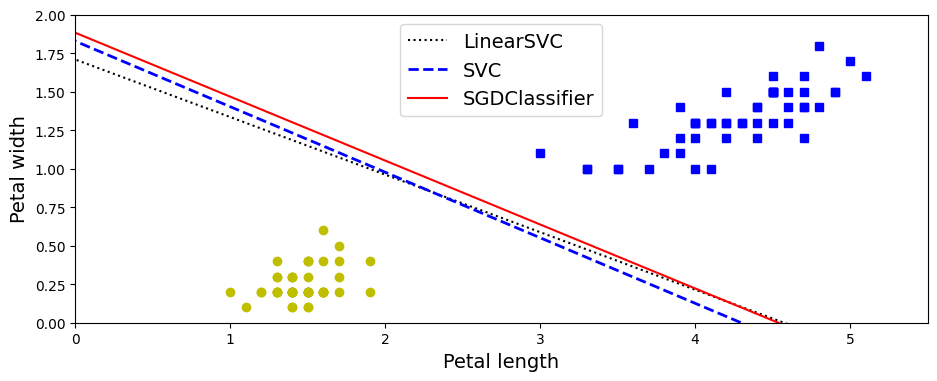

In [12]:
# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()